<a href="https://colab.research.google.com/github/ananyakumaar/NeuralNetworks/blob/main/Image_classification_with_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.utils import to_categorical

In [ ]:
df = load_digits().images
df.shape

(1797, 8, 8)

In [ ]:
target = load_digits().target
target.shape

(1797,)

In [ ]:
df[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
target[0]

0

In [ ]:
plt.style.use('ggplot')

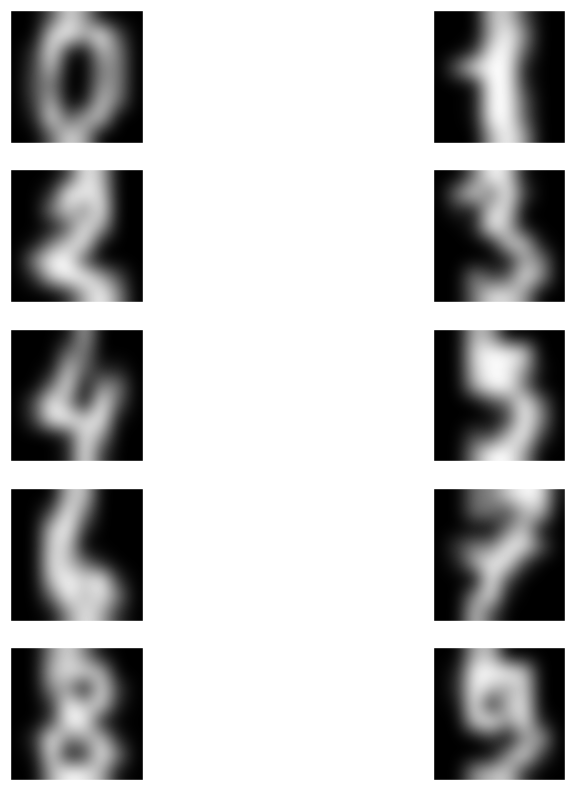

In [ ]:
s=1
plt.figure(figsize=(10,10))
for i in range(10):

    plt.subplot(5,2,s)
    plt.imshow(df[i],cmap="gray",interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    s +=1
plt.show()

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]


In [ ]:
X = df
y = target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [ ]:
w,h  = df[0].shape
X_train = X_train.reshape(len(X_train),w*h)
X_test  = X_test.reshape(len(X_test),w*h)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
def  Prediction_cat(model,image):
    global w,h
    pred = model.predict(image)

    color = ["red"]*10
    num = pred.argmax()
    color[num]  = "blue"

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.imshow(image.reshape(w,h),cmap="gray",interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    plt.title("Image")

    plt.subplot(1,2,2)
    plt.bar(x=[0,1,2,3,4,5,6,7,8,9],height=pred.flatten(),color=color)
    plt.xlabel("Digits")
    plt.ylabel("probability")
    plt.title("Prediction")
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.show()

In [ ]:
model = Sequential()

model.add(Dense(64,input_shape=X_train[0].shape,activation="relu"))

model.add(Dense(128,activation="relu"))

model.add(Dense(64,activation="relu"))

model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
history = model.fit(X_train,y_train_cat,batch_size=32,epochs=20,validation_split=0.1)

Epoch 1/20
33/33 [==============================] - 1s 11ms/step - loss: 1.8015 - acc: 0.4814 - val_loss: 0.4245 - val_acc: 0.8803
Epoch 2/20
33/33 [==============================] - 0s 4ms/step - loss: 0.3862 - acc: 0.8887 - val_loss: 0.2051 - val_acc: 0.9316
Epoch 3/20
33/33 [==============================] - 0s 4ms/step - loss: 0.2015 - acc: 0.9391 - val_loss: 0.0922 - val_acc: 0.9744
Epoch 4/20
33/33 [==============================] - 0s 4ms/step - loss: 0.1234 - acc: 0.9667 - val_loss: 0.0947 - val_acc: 0.9829
Epoch 5/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0690 - acc: 0.9876 - val_loss: 0.0993 - val_acc: 0.9658
Epoch 6/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0576 - acc: 0.9876 - val_loss: 0.1189 - val_acc: 0.9658
Epoch 7/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0435 - acc: 0.9933 - val_loss: 0.0943 - val_acc: 0.9829
Epoch 8/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0259 - acc: 0.9

In [ ]:
result = model.evaluate(X_test.reshape(629,64),y_test_cat)

20/20 [==============================] - 0s 2ms/step - loss: 0.1005 - acc: 0.9714


In [ ]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.10050550103187561
acc : 0.9713831543922424


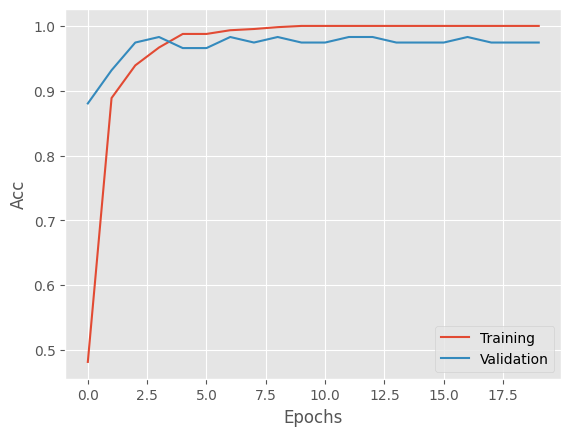

In [ ]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend(["Training","Validation"])
plt.show()

1/1 [==============================] - 0s 22ms/step


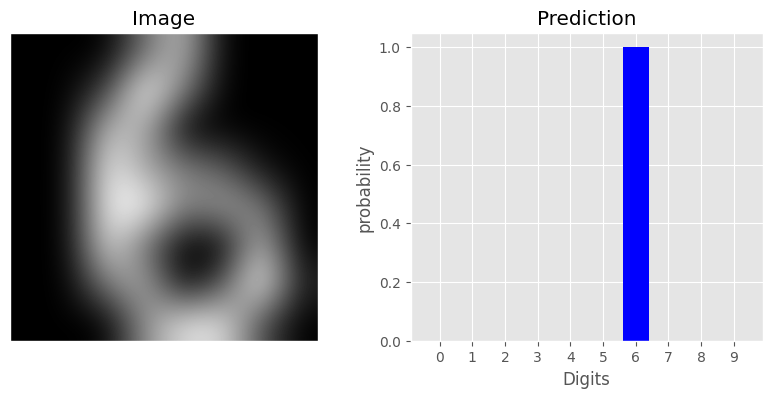

1/1 [==============================] - 0s 22ms/step


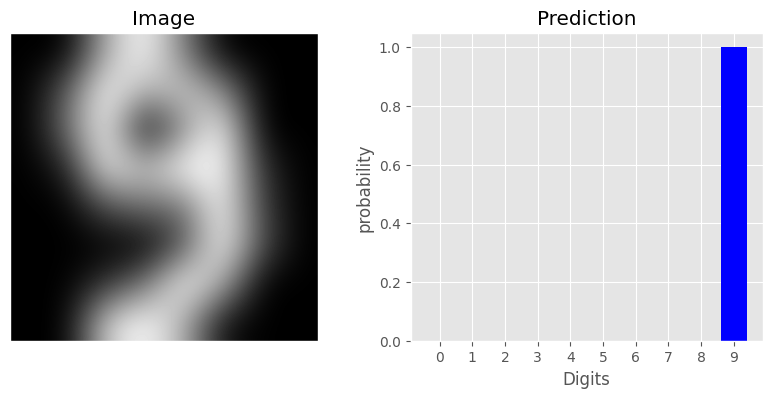

1/1 [==============================] - 0s 21ms/step


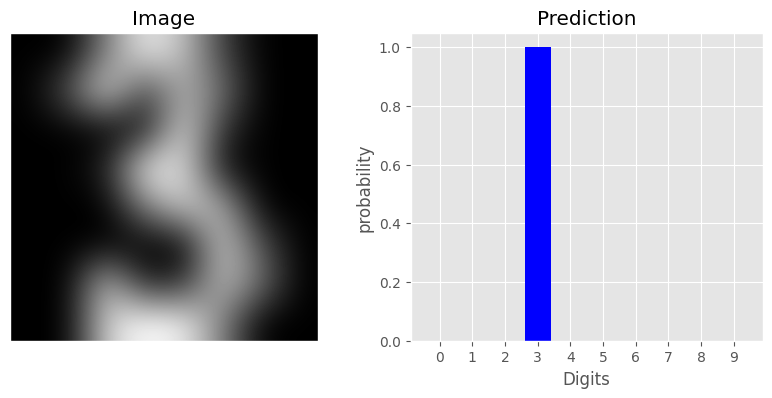

1/1 [==============================] - 0s 22ms/step


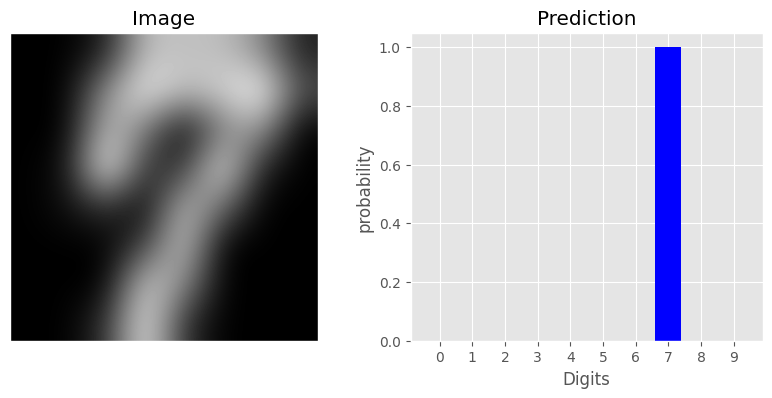

1/1 [==============================] - 0s 33ms/step


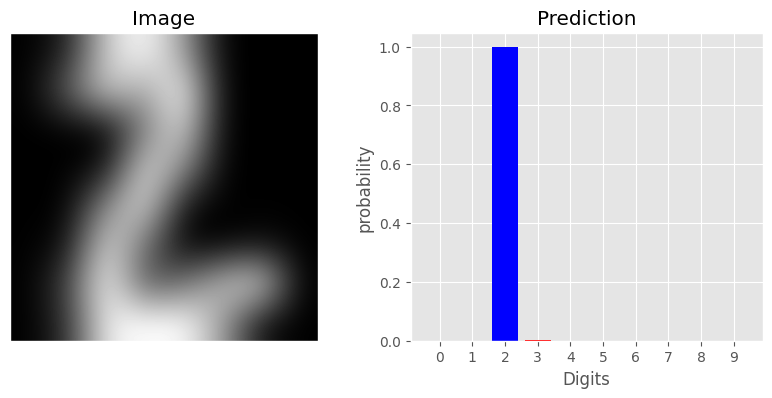

1/1 [==============================] - 0s 23ms/step


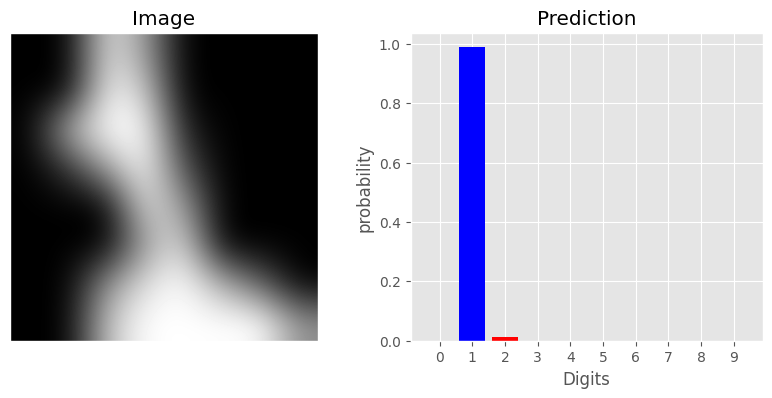

1/1 [==============================] - 0s 22ms/step


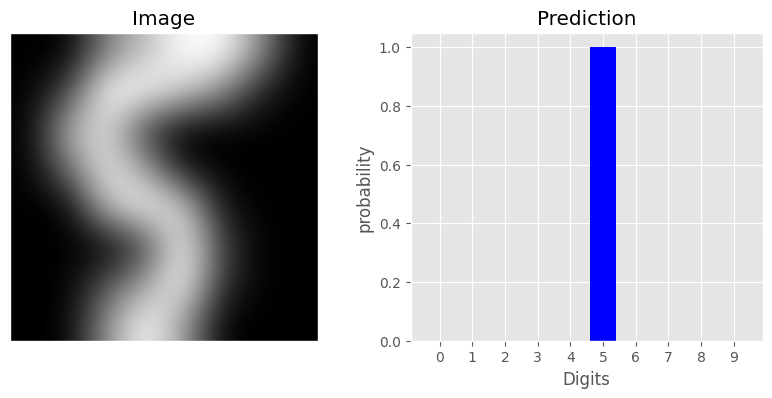

1/1 [==============================] - 0s 20ms/step


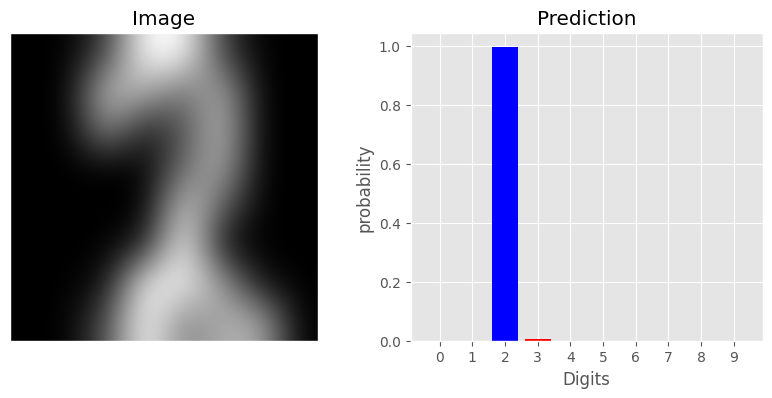

1/1 [==============================] - 0s 21ms/step


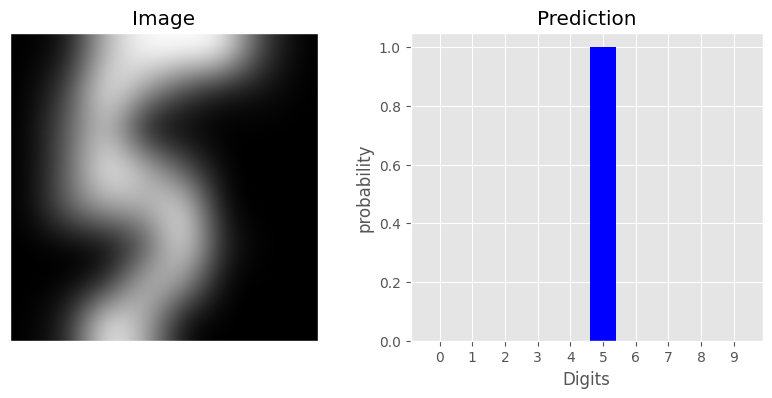

1/1 [==============================] - 0s 27ms/step


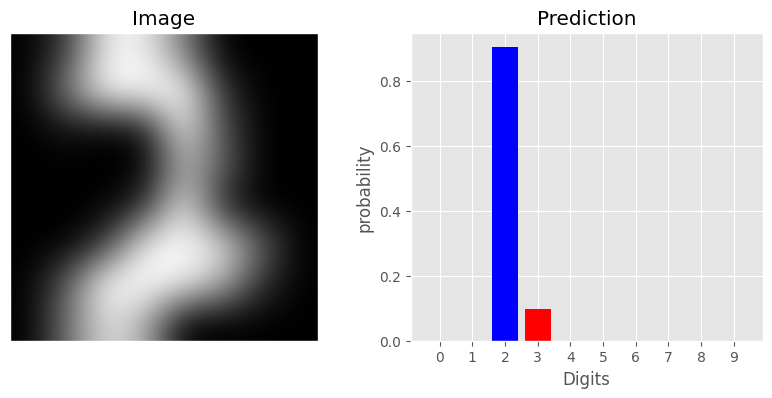

In [ ]:
for i in range(10):
    Prediction_cat(model,X_test[i].reshape(1,-1))